In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
import numpy as np

In [27]:
data: pd.DataFrame = pd.read_csv('tubePos.csv')
data.columns = data.columns.str.strip()

xMax: float = data["x[cm]"].max()
xMin: float = data["x[cm]"].min()

yMax: float = data["y[cm]"].max()
yMin: float = data["y[cm]"].min()

class AnyObject:
    pass

class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = Circle(xy=center, radius=0.8*(height + ydescent))
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/detector/stt_xyProjection_polarity.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/detector/stt_xyProjection_polarity.pdf


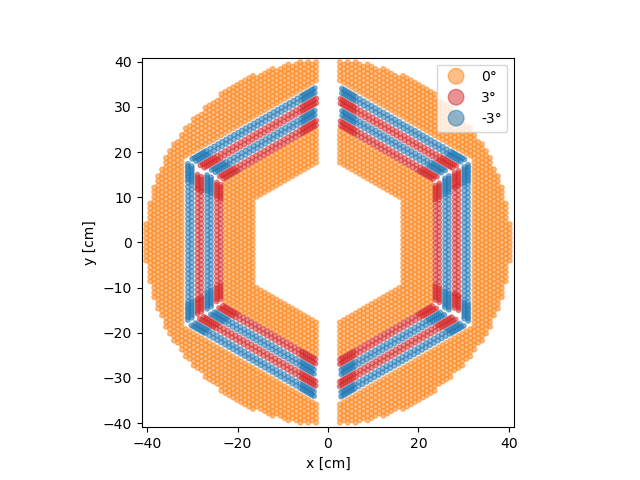

In [59]:
fig, ax= plt.subplots()

for index, row in data.iterrows():
	if row['angle[°]'] == 0:
		straightTube = Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color='tab:orange', alpha=0.5)
		ax.add_patch(straightTube)
	elif np.sign(row['angle[°]']) == 1:
		posSkewedTube = Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color='tab:red', alpha=0.5)
		ax.add_patch(posSkewedTube)
	elif np.sign(row['angle[°]']) == -1:
		negSkewedTube = Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color='tab:blue', alpha=0.5)
		ax.add_patch(negSkewedTube)
	else:
		raise Exception("Invalid angle")
 
ax.set_xlim(xMin-1, xMax+1)
ax.set_xlabel("x [cm]")
ax.set_ylim(yMin-1, yMax+1)
ax.set_ylabel("y [cm]")

ax.set_aspect('equal')

ax.legend([straightTube,posSkewedTube,negSkewedTube], 
          ["0°","3°","-3°"], handler_map={Circle: HandlerEllipse()}, loc='upper right')

imagePath = "/mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization"
imgPath = imagePath + "/detector/stt_xyProjection_polarity"

print("Saving png image to: ", imgPath+".png")
#plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
#plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/detector/stt_xyProjection_sectors.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/detector/stt_xyProjection_sectors.pdf


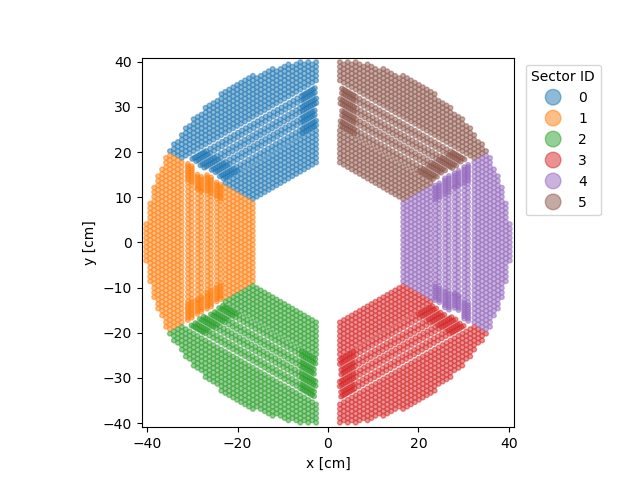

In [64]:
fig, ax= plt.subplots()

tab10List = plt.get_cmap('tab10').colors
uniqueSectorTubes = []
uniqueSector = []

for index, row in data.iterrows():
	tube = Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color=tab10List[int(row['sectorID'])], alpha=0.5)
	if row['sectorID'] not in uniqueSector:
		uniqueSector.append(int(row['sectorID']))
		uniqueSectorTubes.append(tube)
	ax.add_patch(tube)
 
ax.set_xlim(xMin-1, xMax+1)
ax.set_xlabel("x [cm]")
ax.set_ylim(yMin-1, yMax+1)
ax.set_ylabel("y [cm]")

ax.set_aspect('equal')

plt.legend(uniqueSectorTubes,
          uniqueSector, handler_map={Circle: HandlerEllipse()}, loc='upper right',title="Sector ID", bbox_to_anchor=(1.25, 1))

imagePath = "/mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization"
imgPath = imagePath + "/detector/stt_xyProjection_sectors"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/detector/stt_xyProjection_layers.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/detector/stt_xyProjection_layers.pdf


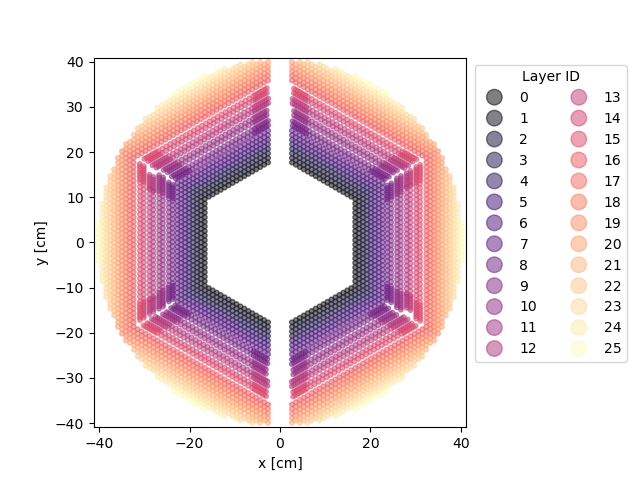

In [65]:
fig, ax= plt.subplots()

uniqueLayerTubes = []
uniqueLayer = []

n_lines = 26
cmap = plt.colormaps['magma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

for index, row in data.iterrows():
	tube = Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color=colors[int(row['layerID'])], alpha=0.5)
	if row['layerID'] not in uniqueLayer:
		uniqueLayer.append(int(row['layerID']))
		uniqueLayerTubes.append(tube)
	ax.add_patch(tube)
 
ax.set_xlim(xMin-1, xMax+1)
ax.set_xlabel("x [cm]")
ax.set_ylim(yMin-1, yMax+1)
ax.set_ylabel("y [cm]")

ax.set_aspect('equal')

plt.legend(uniqueLayerTubes,
          uniqueLayer, handler_map={Circle: HandlerEllipse()}, loc='upper right',title="Layer ID",ncols=2,bbox_to_anchor=(1.45, 1))

imagePath = "/mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization"
imgPath = imagePath + "/detector/stt_xyProjection_layers"

plt.subplots_adjust(right=0.75)  # Adjust this value based on your specific needs

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')